In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv 
df = pd.read_csv('interns.csv')

In [3]:
df.head()

,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Cohort
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,11-Aug-23,AUG 11 WD 23
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,11-Aug-23,AUG 11 WD 23
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,11-Aug-23,AUG 11 WD 23
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,11-Aug-23,AUG 11 WD 23
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,11-Aug-23,AUG 11 WD 23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2681 non-null   object 
 1   First Name     2683 non-null   object 
 2   Age            2677 non-null   float64
 3   Country        2683 non-null   object 
 4   City           2677 non-null   object 
 5   Timezone       2668 non-null   object 
 6   EduQuest Date  2683 non-null   object 
 7   Cohort         2683 non-null   object 
dtypes: float64(1), object(7)
memory usage: 167.8+ KB


In [5]:
df.describe()

,Age
count,2677.000000
mean,26.223011
std,77.480071
min,-2.000000
25%,18.000000
50%,21.000000
75%,27.000000
max,2021.000000


In [6]:
df.isnull().sum()

ID                2
First Name        0
Age               6
Country           0
City              6
Timezone         15
EduQuest Date     0
Cohort            0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [8]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

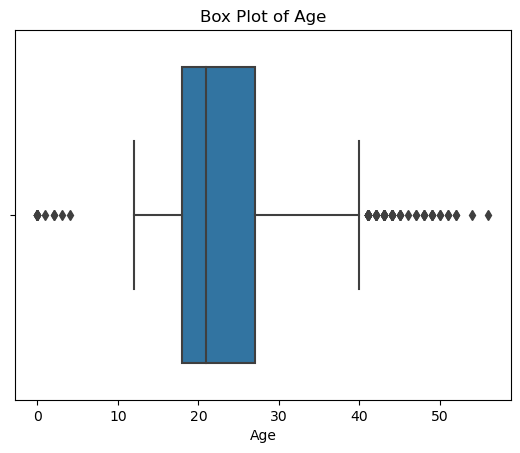

In [9]:
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')

plt.show()

In [10]:
df = df[(df['Age'] >= 13) & (df['Age'] <= 100)]

Age lower than 13 and greater than 100 is removed in above code.


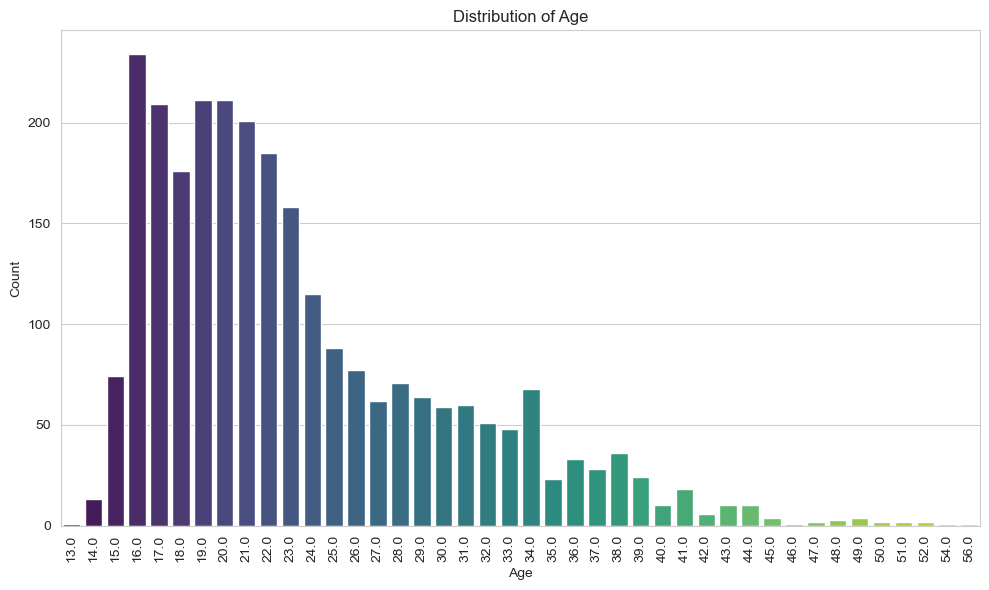

In [11]:
# Plot for for Age Distribution
sns.set_style('whitegrid')

# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
age_dist_plot = sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# Create a new column for age groups
bins = [12, 20, float('inf')]
labels = ['13-20', '20+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Encode age groups as numeric values
df['Age Group Encoded'] = df['Age Group'].map({'13-20': 0, '20+': 1})

# Check the data
print(df.head())

      ID First Name   Age        Country      City   Timezone EduQuest Date  \
0   5272     Albina  16.0        Ukraine      Kyiv  GMT+03:00     11-Aug-23   
1  40345      Ceren  16.0         Turkey  Istanbul  GMT+03:00     11-Aug-23   
2  40438      Dipin  20.0          Nepal  Katmandu  GMT+05:45     11-Aug-23   
3  40657    Violeta  25.0  United states  New_york  GMT-04:00     11-Aug-23   
4  40291      Cansu  17.0         Turkey  Istanbul  GMT+03:00     11-Aug-23   

         Cohort Age Group Age Group Encoded  
0  AUG 11 WD 23     13-20                 0  
1  AUG 11 WD 23     13-20                 0  
2  AUG 11 WD 23       20+                 1  
3  AUG 11 WD 23       20+                 1  
4  AUG 11 WD 23     13-20                 0  


In [13]:
df['Age Group'].value_counts()
# df['Age Group'].isnull().sum()

20+      1738
13-20     918
Name: Age Group, dtype: int64

In [14]:
# df['Age Group Encoded'].value_counts()
df['Age Group Encoded'].isnull().sum()

0

In [15]:
df['Cohort'].value_counts()

NOV 18 WE 23     236
JAN 6 WE 24      215
JUN 24 WE 24     191
AUG 19 WE 23     174
SEP 16 WE 23     171
FEB 3 WE 24      163
JUL 22 WE 24     154
OCT 21 WE 23     151
MAR 9 WE 24      139
JUN 3 WE 24      126
JUL 6 WE 24       95
APR 15 WE 24      95
JUN 15 WE 24      94
NOV 24 WD 23      86
MAR 8 WE 24       83
APR 13 WE 24      77
FEB 16 WE 24      77
JAN 5 WD 24       54
MAR 29 WE 24      47
AUG 11 WD 23      46
SEP 1 WD 23       42
SEP 22 WD 23      38
MAY 6 WD 24       37
OCT 13 WD 23      32
MAR 8 WD 24       20
MAR 30 WE 24      12
explorerbBemZ      1
Name: Cohort, dtype: int64

In [16]:
df[df['Cohort'] == 'explorerbBemZ']


,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Cohort,Age Group,Age Group Encoded
188,40636,Feyzanur,24.0,Turkey,Istanbul,GMT+03:00,20-Aug-23,explorerbBemZ,20+,1


In [17]:
# replacing 'EduQuest Date' and 'Cohort' to nearest possible one as this is the only data that we have or this date.
df['EduQuest Date'] = df['EduQuest Date'].replace('Aug 20, 2023', 'AUG 19 WE 23')

In [18]:
df['Cohort'] = df['Cohort'].replace('explorerbBemZ', 'AUG 19 WE 23')

In [19]:
df.drop(df[df['Cohort'] == 'explorerbBemZ'].index, inplace=True)
df['Cohort'].value_counts()

NOV 18 WE 23    236
JAN 6 WE 24     215
JUN 24 WE 24    191
AUG 19 WE 23    175
SEP 16 WE 23    171
FEB 3 WE 24     163
JUL 22 WE 24    154
OCT 21 WE 23    151
MAR 9 WE 24     139
JUN 3 WE 24     126
JUL 6 WE 24      95
APR 15 WE 24     95
JUN 15 WE 24     94
NOV 24 WD 23     86
MAR 8 WE 24      83
APR 13 WE 24     77
FEB 16 WE 24     77
JAN 5 WD 24      54
MAR 29 WE 24     47
AUG 11 WD 23     46
SEP 1 WD 23      42
SEP 22 WD 23     38
MAY 6 WD 24      37
OCT 13 WD 23     32
MAR 8 WD 24      20
MAR 30 WE 24     12
Name: Cohort, dtype: int64

## Clustering data according to cohort and age
##### Segregate Data by Cohort:

- Cohort: Each cohort represents a distinct group of interns, typically based on the Eduquest they have applied for. (e.g., "AUG 11 WD 23").
- Data Filtering: The data is first filtered to seperate records belonging to each unique cohort.
  
##### Apply K-means Clustering:

- Feature Selection: For clustering, we have use 'Age' feature.
- Age encoding: Age is categorically encoded on the basis of two range '13-20' and '20+' as 0 and 1 respectively.
- Clustering Algorithm: K-means clustering is used to segment the interns into clusters based on their age. We typically use two clusters (e.g., '13-20' and '20+').


In [20]:
# Get unique cohorts
cohorts = df['Cohort'].unique()

# Dictionary to store clustered data
clustered_data_by_age = {}

for cohort in cohorts:
    # Filter data for the current cohort
    cohort_data = df[df['Cohort'] == cohort]

    # K-means clustering based on age group encoding
    kmeans = KMeans(n_clusters=2, random_state=0)  
    cohort_data['Age Cluster'] = kmeans.fit_predict(cohort_data[['Age Group Encoded']])
    
    clustered_data_by_age[cohort] = cohort_data

    print(f'Clustered data for cohort {cohort}:')
    print(cohort_data[['ID', 'Age', 'Age Group', 'Age Group Encoded', 'Age Cluster']])

Clustered data for cohort AUG 11 WD 23:
       ID   Age Age Group Age Group Encoded  Age Cluster
0    5272  16.0     13-20                 0            0
1   40345  16.0     13-20                 0            0
2   40438  20.0       20+                 1            1
3   40657  25.0       20+                 1            1
4   40291  17.0     13-20                 0            0
5   40828  22.0       20+                 1            1
6   40284  23.0       20+                 1            1
7   40176  22.0       20+                 1            1
8   40300  24.0       20+                 1            1
9   40888  27.0       20+                 1            1
10  39134  17.0     13-20                 0            0
11  40391  16.0     13-20                 0            0
12  40853  20.0       20+                 1            1
13  40285  25.0       20+                 1            1
14  38951  20.0       20+                 1            1
15  40111  16.0     13-20                 0     

Clustered data for cohort OCT 13 WD 23:
        ID   Age Age Group Age Group Encoded  Age Cluster
474  43496  17.0     13-20                 0            1
475  43634  20.0       20+                 1            0
476  43744  19.0     13-20                 0            1
477  43651  18.0     13-20                 0            1
478  43750  19.0     13-20                 0            1
479  44429  19.0     13-20                 0            1
480  43619  25.0       20+                 1            0
481  43656  21.0       20+                 1            0
482  44563  18.0     13-20                 0            1
483  43623  30.0       20+                 1            0
484  43562  17.0     13-20                 0            1
485  44468  22.0       20+                 1            0
486  43674  41.0       20+                 1            0
487  43587  19.0     13-20                 0            1
488  44176  19.0     13-20                 0            1
489  43307  22.0       20+      

Clustered data for cohort FEB 3 WE 24:
         ID   Age Age Group Age Group Encoded  Age Cluster
1257  49172  14.0     13-20                 0            0
1258  49119  15.0     13-20                 0            0
1259  49368  15.0     13-20                 0            0
1260  49300  15.0     13-20                 0            0
1261  49448  15.0     13-20                 0            0
...     ...   ...       ...               ...          ...
1415  49483  37.0       20+                 1            1
1416  48810  38.0       20+                 1            1
1417  48571  39.0       20+                 1            1
1418  48480  41.0       20+                 1            1
1419  48701  48.0       20+                 1            1

[163 rows x 5 columns]
Clustered data for cohort FEB 16 WE 24:
                            ID   Age Age Group Age Group Encoded  Age Cluster
1421  65b8a67e9168618ac5a50601  22.0       20+                 1            0
1422  65b2caeb9f9f640b8b5baa1a  1

Clustered data for cohort MAR 30 WE 24:
                            ID   Age Age Group Age Group Encoded  Age Cluster
1795  65fa15d7b7b61a2ff7024add  34.0       20+                 1            0
1796  65df59614f145ba77e67ee2c  18.0     13-20                 0            1
1797  65e86cd270d30c30dc7d9f81  20.0       20+                 1            0
1798  65fca9aedeb2231cc875bb89  17.0     13-20                 0            1
1799  65e96734d5f157986b095045  28.0       20+                 1            0
1800  65e2f1f41eadc63cd7c2755e  29.0       20+                 1            0
1801  65dc1acb816fa440dc035b40  19.0     13-20                 0            1
1802  65b88b70790f6927efea35c4  18.0     13-20                 0            1
1803  65eb36902941ef643b05144f  38.0       20+                 1            0
1804  65f9b938b4702c9c5f7c316f  19.0     13-20                 0            1
1805  65e208141e7b6151f6215317  22.0       20+                 1            0
1806  65b2d7f39f9f640b8b

Clustered data for cohort JUL 6 WE 24:
                            ID   Age Age Group Age Group Encoded  Age Cluster
2434  666d9eab497877bb8fb82905  20.0       20+                 1            1
2435  666f512631238820cb144d8d  27.0       20+                 1            1
2436  65b2ca909f9f640b8b5ba9d4  17.0     13-20                 0            0
2437  66693f3735a29d82f0dc0523  21.0       20+                 1            1
2438  666d17d4cdfc66bc4017a09c  28.0       20+                 1            1
...                        ...   ...       ...               ...          ...
2524  664b6b102468a95264b80368  21.0       20+                 1            1
2525  66736525a00a674caf6d0638  29.0       20+                 1            1
2526  667d834b4e9b1bbf7626c952  28.0       20+                 1            1
2527  66420c4335e3aeb76df5659e  19.0     13-20                 0            0
2528  667cfb09169a0efeb146dd36  37.0       20+                 1            1

[95 rows x 5 columns]
Cl

In [21]:
# sns.scatterplot(x='Age', y='Age Group Encoded', hue='Cluster', palette='viridis', data=df)

# # Add titles and labels
# plt.title('K-means Clustering of Age Groups')
# plt.xlabel('Age')
# plt.ylabel('Age Group Encoded')
# plt.legend(title='Cluster')
# plt.show()

In [22]:
df.head()
df.shape

(2656, 10)

In [23]:
for cohort in cohorts:
    # Calculate Silhouette Score
    X = cohort_data[['Age Group Encoded']]  
    labels = cohort_data['Age Cluster']  

    if len(set(labels)) > 1:  # Ensure there is more than one cluster
        silhouette_avg = silhouette_score(X, labels)
        print(f'Silhouette Score for cohort {cohort}: {silhouette_avg:.4f}')
    else:
        print(f'Not enough clusters for cohort {cohort} to compute Silhouette Score')

Silhouette Score for cohort AUG 11 WD 23: 1.0000
Silhouette Score for cohort AUG 19 WE 23: 1.0000
Silhouette Score for cohort SEP 1 WD 23: 1.0000
Silhouette Score for cohort SEP 16 WE 23: 1.0000
Silhouette Score for cohort SEP 22 WD 23: 1.0000
Silhouette Score for cohort OCT 13 WD 23: 1.0000
Silhouette Score for cohort OCT 21 WE 23: 1.0000
Silhouette Score for cohort NOV 18 WE 23: 1.0000
Silhouette Score for cohort NOV 24 WD 23: 1.0000
Silhouette Score for cohort JAN 5 WD 24: 1.0000
Silhouette Score for cohort JAN 6 WE 24: 1.0000
Silhouette Score for cohort FEB 3 WE 24: 1.0000
Silhouette Score for cohort FEB 16 WE 24: 1.0000
Silhouette Score for cohort MAR 8 WE 24: 1.0000
Silhouette Score for cohort MAR 9 WE 24: 1.0000
Silhouette Score for cohort MAR 8 WD 24: 1.0000
Silhouette Score for cohort MAR 29 WE 24: 1.0000
Silhouette Score for cohort MAR 30 WE 24: 1.0000
Silhouette Score for cohort APR 13 WE 24: 1.0000
Silhouette Score for cohort APR 15 WE 24: 1.0000
Silhouette Score for cohort

### Importing data is XLSX file in directory

In [24]:
import os

def save_excel_by_cohort_and_age_group(df, base_dir='AgeCluster'):
    """
    Save the DataFrame to Excel files organized by cohort, with sheets for each age group.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        base_dir (str): The base directory where the Excel files will be saved.
    """
    # Ensure the base directory exists
    os.makedirs(base_dir, exist_ok=True)

    # unique cohorts and age groups
    cohorts = df['Cohort'].unique()
    age_groups = df['Age Group'].unique()

    for cohort in cohorts:
        cohort_data = df[df['Cohort'] == cohort]
        
        # define the file path
        file_path = os.path.join(base_dir, f'{cohort}.xlsx')
        
        # create an Excel writer object
        with pd.ExcelWriter(file_path) as writer:
            for age_group in age_groups:
                # filetring data by age group
                age_group_data = cohort_data[cohort_data['Age Group'] == age_group]
                
                # defining sheet name
                sheet_name = f'Interns {age_group}'
                
                # write data to the sheet
                age_group_data.to_excel(writer, sheet_name=sheet_name[:31], index=False)  # Sheet name max length is 31 characters
                
                print(f'Data for cohort "{cohort}" and age group "{age_group}" has been exported to sheet "{sheet_name[:31]}" in file "{file_path}"')

save_excel_by_cohort_and_age_group(df)

Data for cohort "AUG 11 WD 23" and age group "13-20" has been exported to sheet "Interns 13-20" in file "AgeCluster\AUG 11 WD 23.xlsx"
Data for cohort "AUG 11 WD 23" and age group "20+" has been exported to sheet "Interns 20+" in file "AgeCluster\AUG 11 WD 23.xlsx"
Data for cohort "AUG 19 WE 23" and age group "13-20" has been exported to sheet "Interns 13-20" in file "AgeCluster\AUG 19 WE 23.xlsx"
Data for cohort "AUG 19 WE 23" and age group "20+" has been exported to sheet "Interns 20+" in file "AgeCluster\AUG 19 WE 23.xlsx"
Data for cohort "SEP 1 WD 23" and age group "13-20" has been exported to sheet "Interns 13-20" in file "AgeCluster\SEP 1 WD 23.xlsx"
Data for cohort "SEP 1 WD 23" and age group "20+" has been exported to sheet "Interns 20+" in file "AgeCluster\SEP 1 WD 23.xlsx"
Data for cohort "SEP 16 WE 23" and age group "13-20" has been exported to sheet "Interns 13-20" in file "AgeCluster\SEP 16 WE 23.xlsx"
Data for cohort "SEP 16 WE 23" and age group "20+" has been exported to